### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('warehouse_messy_data.csv')
df

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,ELECTRONICS,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,gadget y,ELECTRONICS,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,widget a,CLOTHING,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,gadget z,TOYS,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,widget a,FURNITURE,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023
...,...,...,...,...,...,...,...,...,...,...
995,1009,widget b,FURNITURE,Warehouse 2,Aisle 2,100,NaN,Supplier C,In Stock,15/01/2023
996,1823,gadget y,ELECTRONICS,Warehouse 2,Aisle 3,300,19.99,Supplier B,In Stock,20/12/2022
997,1797,gadget z,TOYS,Warehouse 3,Aisle 5,150,9.99,Supplier C,Low Stock,05/03/2023
998,1241,widget c,FURNITURE,Warehouse 2,Aisle 2,100,49.99,Supplier C,Low Stock,20/12/2022


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1000 non-null   int64  
 1   Product Name    1000 non-null   object 
 2   Category        1000 non-null   object 
 3   Warehouse       1000 non-null   object 
 4   Location        1000 non-null   object 
 5   Quantity        842 non-null    object 
 6   Price           793 non-null    float64
 7   Supplier        1000 non-null   object 
 8   Status          1000 non-null   object 
 9   Last Restocked  800 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


In [4]:
df.shape

(1000, 10)

In [5]:
df.isna().sum()

Product ID          0
Product Name        0
Category            0
Warehouse           0
Location            0
Quantity          158
Price             207
Supplier            0
Status              0
Last Restocked    200
dtype: int64

In [6]:
df.describe()

,Product ID,Price
count,1000.000000,793.000000
mean,1503.929000,28.085839
std,289.998108,14.686312
min,1000.000000,9.990000
25%,1242.750000,19.990000
50%,1505.000000,29.990000
75%,1757.250000,49.990000
max,1998.000000,49.990000


### data cleaning process

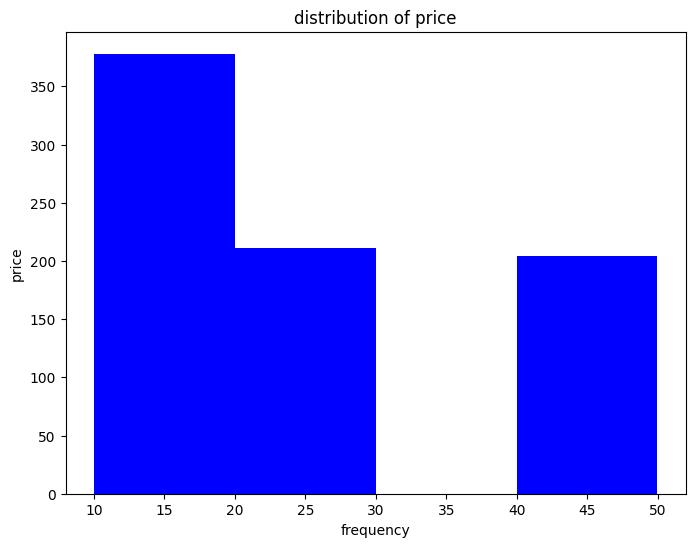

In [7]:
# plotting histogram to check which measure to replace missing values in price
plt.figure(figsize = (8,6))
plt.hist(df['Price'], bins = 4, color ='blue')
plt.title('distribution of price')
plt.xlabel('frequency')
plt.ylabel('price')
plt.show();

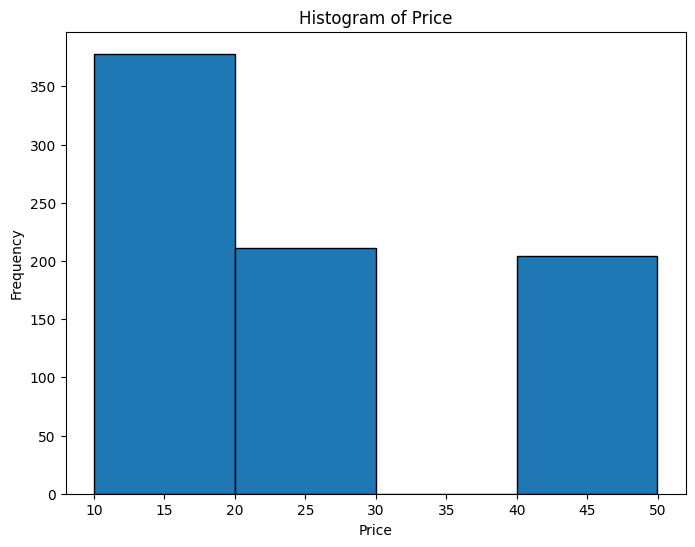

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and an axes
# Plot histogram on the ax
ax.hist(df['Price'], bins=4, edgecolor='black')  # You can adjust 'bins' as needed
ax.set_title('Histogram of Price')  # Set title for the plot
ax.set_xlabel('Price')  # Set x-axis label
ax.set_ylabel('Frequency')  # Set y-axis label
plt.show()


### replacing missing values in price 


In [9]:
#median_price = df['Price'].median()
median_price = df['Price'].median()

In [10]:
#df['Price'].fillna(df['Price'].median,inplace = True)
import warnings
warnings.filterwarnings('ignore')
df['Price'].fillna(median_price, inplace=True)

In [11]:
df.isna().sum()

Product ID          0
Product Name        0
Category            0
Warehouse           0
Location            0
Quantity          158
Price               0
Supplier            0
Status              0
Last Restocked    200
dtype: int64

In [12]:
df.describe()

,Product ID,Price
count,1000.000000,1000.000000
mean,1503.929000,28.480000
std,289.998108,13.099294
min,1000.000000,9.990000
25%,1242.750000,19.990000
50%,1505.000000,29.990000
75%,1757.250000,29.990000
max,1998.000000,49.990000


### changing upper case in category column


In [13]:
df['Category']= df['Category'].str.capitalize()

In [14]:
df.head()

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,Electronics,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,gadget y,Electronics,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,widget a,Clothing,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,gadget z,Toys,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,widget a,Furniture,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023


### cleaning quantity column


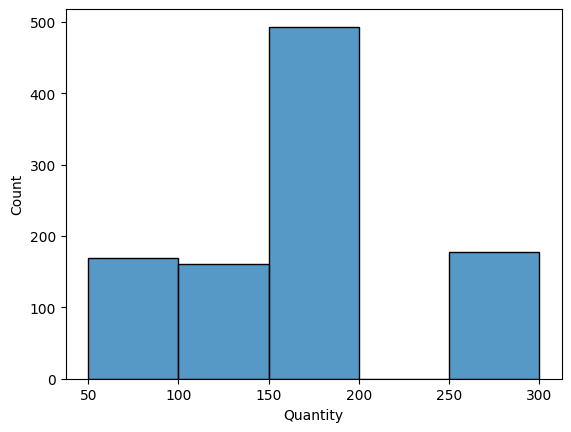

In [15]:
#changing from categorical to numerical
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df['Quantity']= pd.to_numeric(df['Quantity'], errors ='coerce')
df['Quantity'].fillna(df['Quantity'].mean(),inplace = True)
fig, ax = plt.subplots()
sns.histplot(df["Quantity"], bins=5)
plt.show();


In [16]:
df.isna().sum()

Product ID          0
Product Name        0
Category            0
Warehouse           0
Location            0
Quantity            0
Price               0
Supplier            0
Status              0
Last Restocked    200
dtype: int64

In [17]:
#df['Last Restocked ']= pd.to_datetime(df['Last Restocked'], errors ='coerce')
df["Last Restocked"] = pd.to_datetime(df["Last Restocked"], errors = "coerce") 
most_frequent_date = df["Last Restocked"].mode()[0]
df["Last Restocked"].fillna(most_frequent_date, inplace = True)
df.head(2)

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,Electronics,Warehouse 2,Aisle 1,300.000000,9.99,Supplier C,In Stock,2022-12-20
1,1435,gadget y,Electronics,Warehouse 2,Aisle 4,152.346041,19.99,Supplier C,Out of Stock,2022-12-20


In [18]:
df['Product Name']= df['Product Name'].str.title()
df.head(2)

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,Gadget Y,Electronics,Warehouse 2,Aisle 1,300.000000,9.99,Supplier C,In Stock,2022-12-20
1,1435,Gadget Y,Electronics,Warehouse 2,Aisle 4,152.346041,19.99,Supplier C,Out of Stock,2022-12-20


In [19]:
for column in df.select_dtypes(include=["object"]).columns:
    df[column] = df[column].str.strip()


In [20]:
df

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,Gadget Y,Electronics,Warehouse 2,Aisle 1,300.000000,9.99,Supplier C,In Stock,2022-12-20
1,1435,Gadget Y,Electronics,Warehouse 2,Aisle 4,152.346041,19.99,Supplier C,Out of Stock,2022-12-20
2,1860,Widget A,Clothing,Warehouse 2,Aisle 3,100.000000,19.99,Supplier B,In Stock,2022-12-20
3,1270,Gadget Z,Toys,Warehouse 2,Aisle 4,50.000000,49.99,Supplier B,In Stock,2022-12-20
4,1106,Widget A,Furniture,Warehouse 3,Aisle 3,152.346041,9.99,Supplier D,Out of Stock,2023-04-25
...,...,...,...,...,...,...,...,...,...,...
995,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.000000,29.99,Supplier C,In Stock,2023-01-15
996,1823,Gadget Y,Electronics,Warehouse 2,Aisle 3,300.000000,19.99,Supplier B,In Stock,2022-12-20
997,1797,Gadget Z,Toys,Warehouse 3,Aisle 5,150.000000,9.99,Supplier C,Low Stock,2023-03-05
998,1241,Widget C,Furniture,Warehouse 2,Aisle 2,100.000000,49.99,Supplier C,Low Stock,2022-12-20


In [21]:
df.to_csv('cleaned_warehouse_dataset.csv', index=False)

# Explaratory Data Analysis(EDA) insights
An Exploratory Data Analysis (EDA) will help to uncover patterns, detect anomalies, and gain insights from the data.

Using the warehouse dataset, the EDA involved creating visualisations to better understand the distribution of products, price ranges, stock status, and the relationship between quantity and price.

In addition, the frequency of restocking events by different suppliers was examined to identify potential trends or inconsistencies in the supply chain.
## 1.distribution of products across categories

There seems to be a slight variation in the number of products across categories as illustrated below. The furniture category has the heaviest stock, indicating their popularity or demand, while the Toys category has the lowest or fewer products.

In [22]:
df_cleaned = pd.read_csv('cleaned_warehouse_dataset.csv')
df_cleaned.head()

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,Gadget Y,Electronics,Warehouse 2,Aisle 1,300.000000,9.99,Supplier C,In Stock,2022-12-20
1,1435,Gadget Y,Electronics,Warehouse 2,Aisle 4,152.346041,19.99,Supplier C,Out of Stock,2022-12-20
2,1860,Widget A,Clothing,Warehouse 2,Aisle 3,100.000000,19.99,Supplier B,In Stock,2022-12-20
3,1270,Gadget Z,Toys,Warehouse 2,Aisle 4,50.000000,49.99,Supplier B,In Stock,2022-12-20
4,1106,Widget A,Furniture,Warehouse 3,Aisle 3,152.346041,9.99,Supplier D,Out of Stock,2023-04-25


In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1000 non-null   int64  
 1   Product Name    1000 non-null   object 
 2   Category        1000 non-null   object 
 3   Warehouse       1000 non-null   object 
 4   Location        1000 non-null   object 
 5   Quantity        1000 non-null   float64
 6   Price           1000 non-null   float64
 7   Supplier        1000 non-null   object 
 8   Status          1000 non-null   object 
 9   Last Restocked  1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


In [24]:
distribution_counts =df_cleaned['Category'].value_counts()
distribution_counts

Category
Furniture      265
Clothing       257
Electronics    248
Toys           230
Name: count, dtype: int64

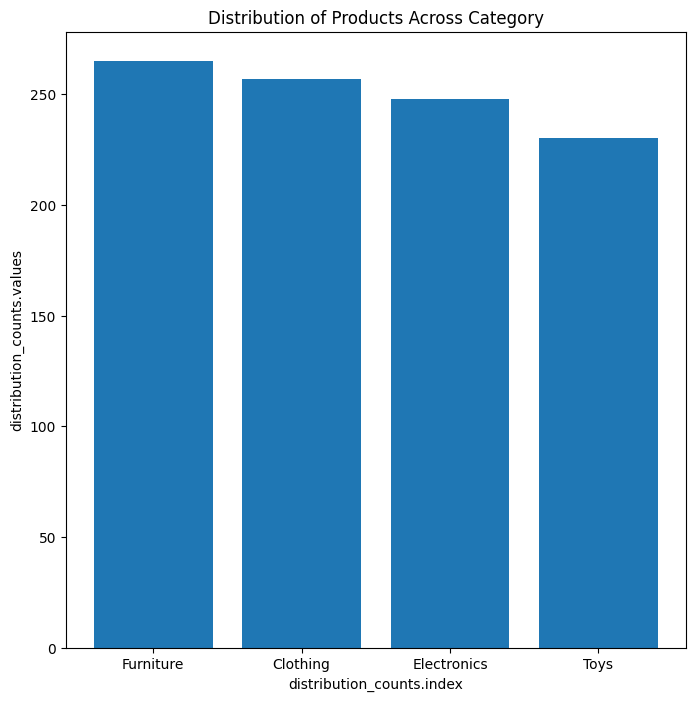

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))  # Create a figure and an axes
# Example: Plotting a bar chart
# Ensure that df_cleaned['Category'] and distribution_counts have the same length
ax.bar(distribution_counts.index, distribution_counts.values)
ax.set_title('Distribution of Products Across Category')  # Set title for the plot
ax.set_xlabel('distribution_counts.index')# Set x-axis label
ax.set_ylabel('distribution_counts.values')
plt.show()



Furniture stock has the highest demand while toys has the lowest demand.There is slight variation across the categories


# 2.price distrbution


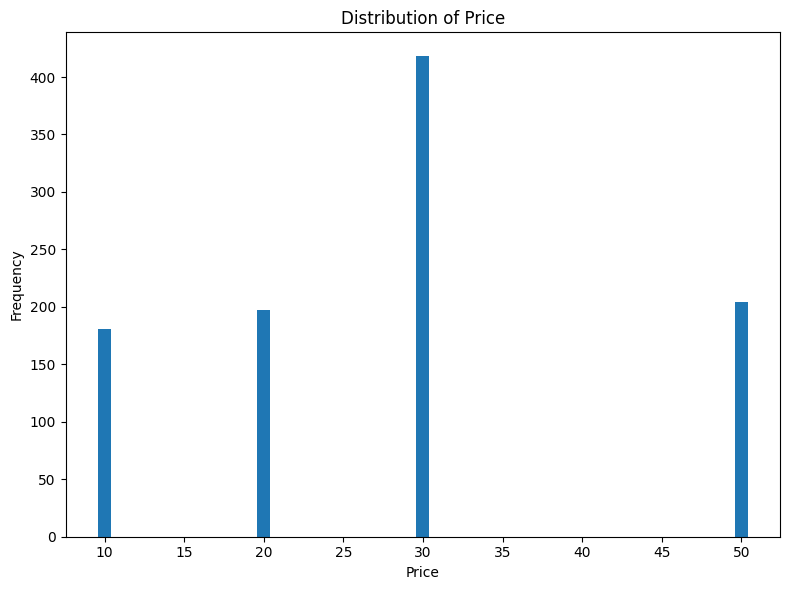

In [27]:
frequency = df_cleaned['Price'].value_counts()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(frequency.index, frequency.values)
ax.set_title('Distribution of Price')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show();


The prices of products are distributed within a specific range, 
primarily clustering around the average price of $28 as can be observed below. 
This suggests a standard pricing strategy with few high-priced items.


### 3.Stock status distribution

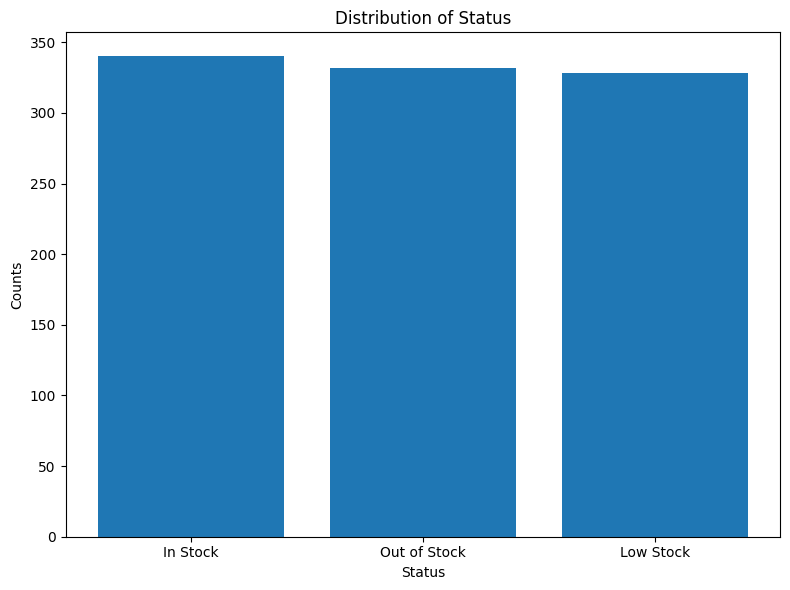

In [29]:
counts = df_cleaned['Status'].value_counts()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts.values)
ax.set_title('Distribution of Status')
ax.set_xlabel('Status')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show();


A slight majority of products seem to be in stock, 
but a significant portion is out of stock, 
which could indicate supply chain issues or high demand.


# 4.Relation between quantity and price

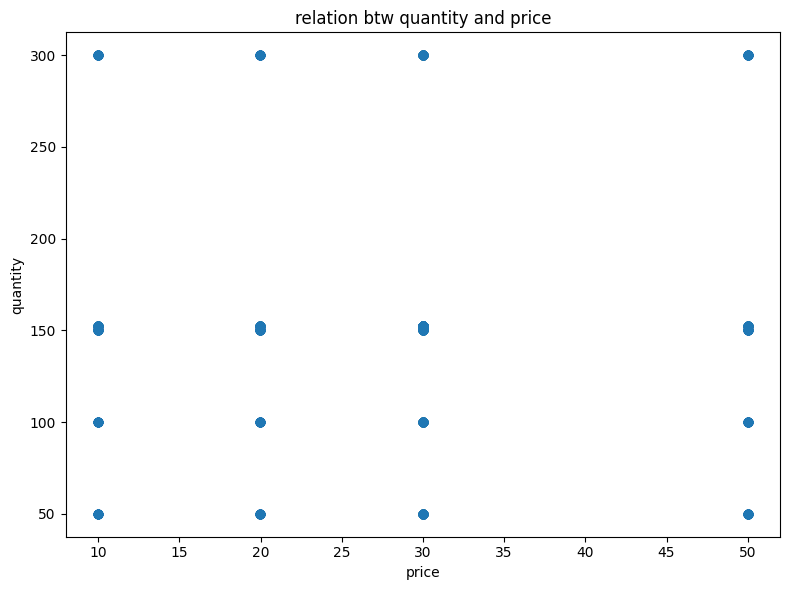

In [31]:
#counts = df_cleaned['Status'].value_counts()
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df_cleaned['Price'],df_cleaned['Quantity'])
ax.set_title('relation btw quantity and price')
ax.set_xlabel('price')
ax.set_ylabel('quantity')
plt.tight_layout()
plt.show();

there seems there is no clear relationship between quantity and price...meaning price is influenced by other factors rather than quantity

# 5. frequency of restocking events by supplier

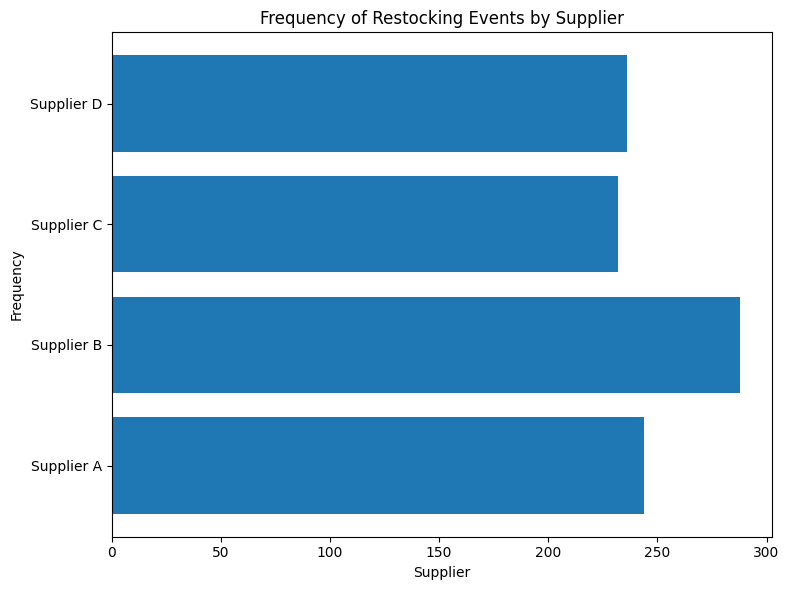

In [32]:
# Group the data by 'Supplier' and count the 'Last Restocked' events
restock_frequency = df_cleaned.groupby('Supplier')['Last Restocked'].count()

# Plot histogram
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(restock_frequency.index, restock_frequency.values)  # Use bar plot for categorical x-axis
ax.set_title('Frequency of Restocking Events by Supplier')
ax.set_ylabel('Frequency')
ax.set_xlabel('Supplier')
plt.tight_layout()
plt.show()

The frequency of restocking varies by supplier but supplier B has supplied more than others.
All the suppliers seem to be having multiple restocking events which suggests a more frequent supply chain connection or higher demand for their products.


# Detailed analysis of the warehouse data
## A. Stock Analysis
Stock analysis focused on understanding the availability of products across different categories, identifying frequently out-of-stock products, and analysing restocking patterns.

We identified categories with higher average stock levels, highlighted products that were frequently out of stock, and examined the restocking frequency of various suppliers
### Stock Analysis Insights
#### 1.Average Quantity per Product Category

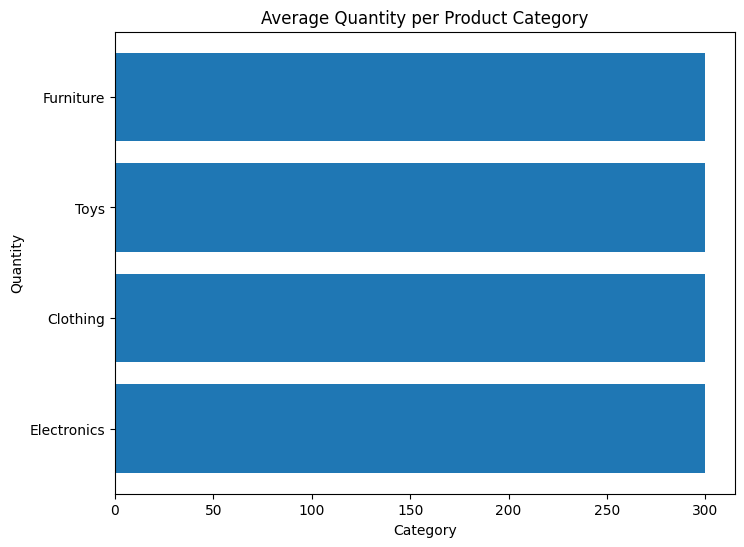

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(df_cleaned['Category'], df_cleaned['Quantity'])
ax.set_title('Average Quantity per Product Category')
ax.set_xlabel('Category')
ax.set_ylabel('Quantity')
plt.show();

The average quantity per category varies only slightly. The Furniture category has the lowest average quantities, potentially indicating less demand 

### 2. Products Frequently Out of Stock:

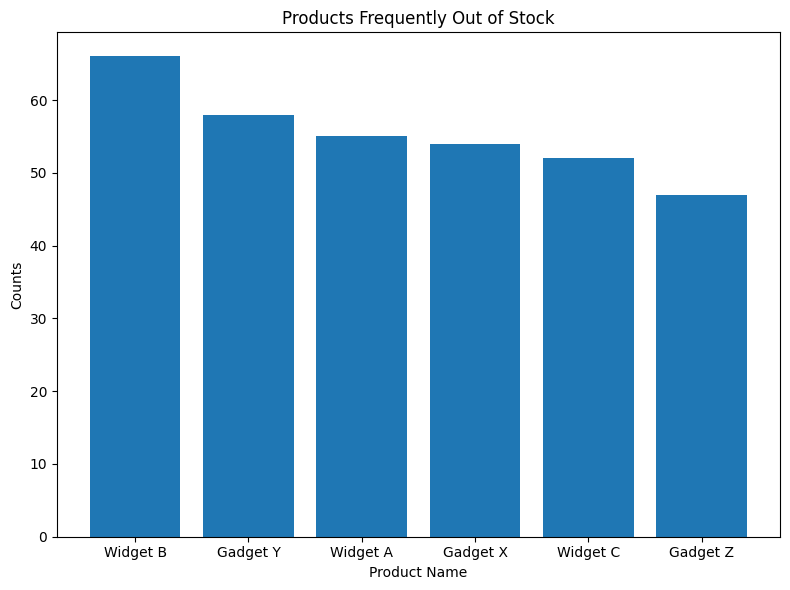

In [34]:
frequently_out_stock = df_cleaned.groupby('Product Name')['Status'].apply(lambda x: (x == 'Out of Stock').sum()).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(frequently_out_stock.index, frequently_out_stock.values)
ax.set_title('Products Frequently Out of Stock')
ax.set_xlabel('Product Name')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show()

The analysis shows that certain products (especially Widget B) are more frequently out of stock.
This could indicate high demand, supply chain issues, or insufficient stock management.
These products may require closer monitoring to avoid stockouts.


### 3. Most Restocked Products and Their Suppliers:

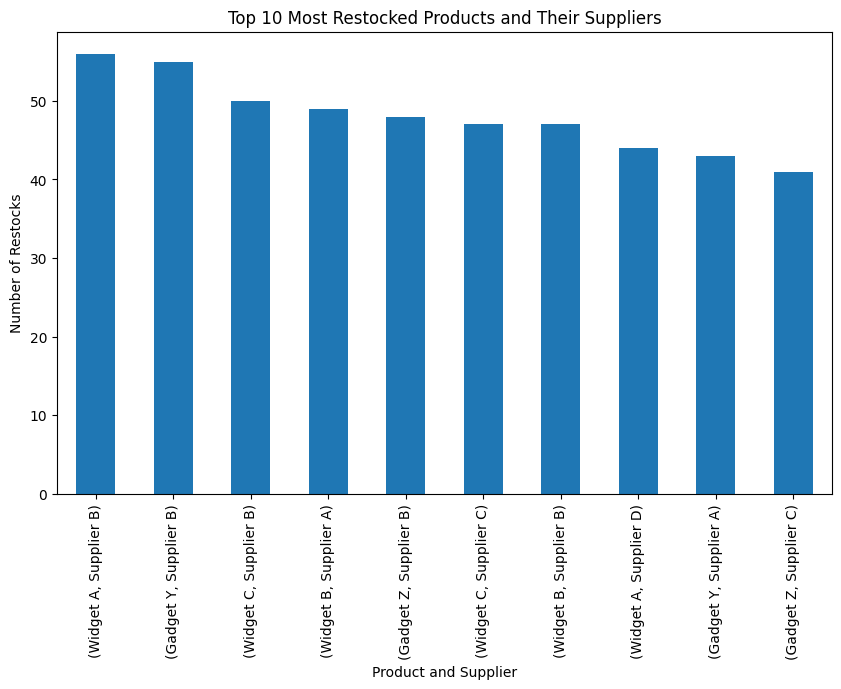

In [35]:
restocked_products = df_cleaned.groupby(['Product Name', 'Supplier']).size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
restocked_products.head(10).plot(kind='bar')
plt.title('Top 10 Most Restocked Products and Their Suppliers')
plt.xlabel('Product and Supplier')
plt.ylabel('Number of Restocks')
plt.show()

Certain products like Widget A and Gadjet Y both associated with Supplier B seem to be restocked more frequently. This could suggest a strong relationship between these products and their supplier, potentially due to higher demand or faster turnover rates.

## B. Supplier Analysis
Understanding the role of suppliers is vital for optimising stock levels and ensuring a reliable supply chain.

The analysis revealed the number of products provided by each supplier, highlighted suppliers with frequent restocking events, and analysed the dependency on specific suppliers.

These insights are essential for managing supplier relationships and ensuring that stock levels are maintained efficiently.

### Supplier Analysis Insights:

### 1.Number of Products Supplied by Each Supplier

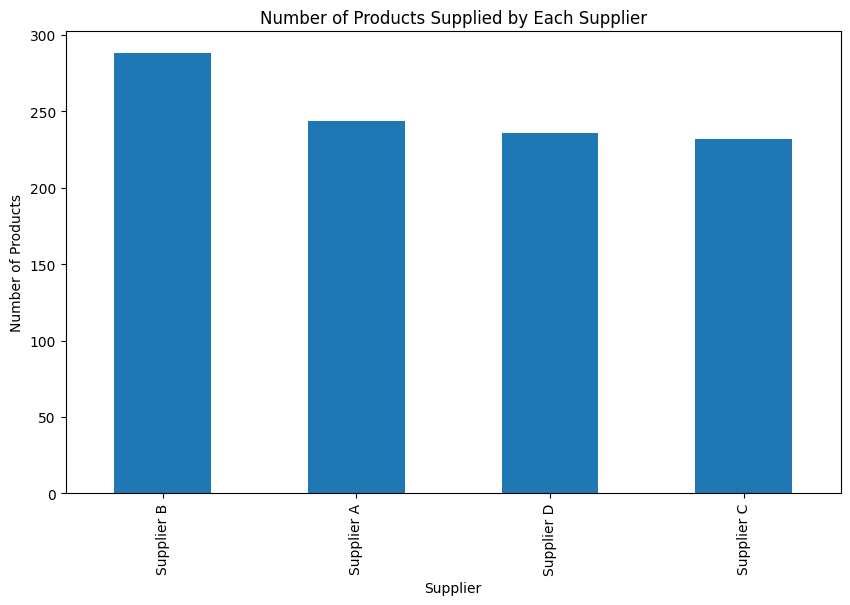

In [36]:
products_per_supplier = df_cleaned['Supplier'].value_counts()

plt.figure(figsize=(10, 6))
products_per_supplier.plot(kind='bar')
plt.title('Number of Products Supplied by Each Supplier')
plt.xlabel('Supplier')
plt.ylabel('Number of Products')
plt.show()

supplier B has supplied more products compared to other suppliers

### 2.Average Restock Time per Supplier:

<Figure size 1000x600 with 0 Axes>

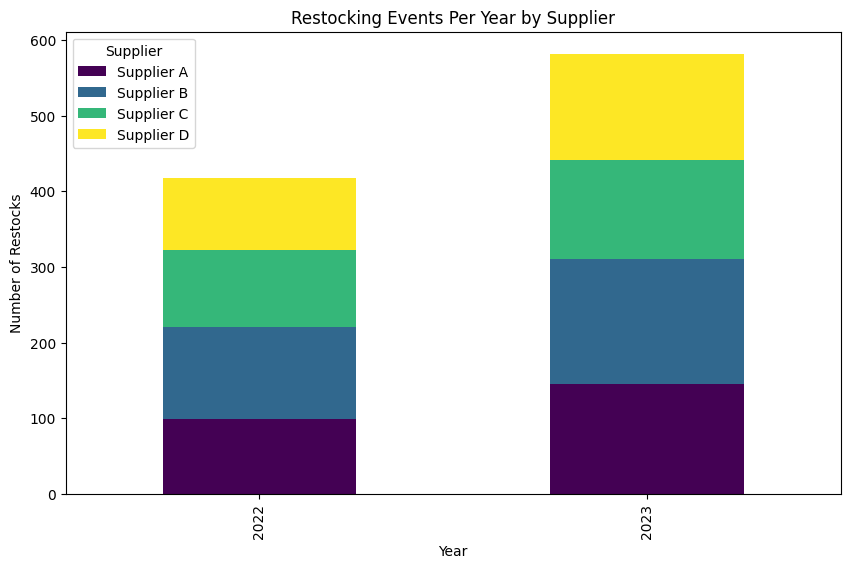

In [37]:
df_cleaned['Last Restocked'] = pd.to_datetime(df_cleaned['Last Restocked'], errors='coerce')
df_cleaned['Restock Year'] = df_cleaned['Last Restocked'].dt.year
restock_counts_per_supplier = df_cleaned.groupby(['Supplier', 'Restock Year']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
restock_counts_per_supplier.T.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
plt.title('Restocking Events Per Year by Supplier')
plt.xlabel('Year')
plt.ylabel('Number of Restocks')
plt.show();

The analysis of restocking events over time by year shows that suppliers consistently restock more frequently in the year 2023 with the number of restocks nearing 600 for the same year.
This could be due to higher demand for their products or a more efficient supply chain relationship in 2023.

### 3.Dependency on Specific Suppliers:

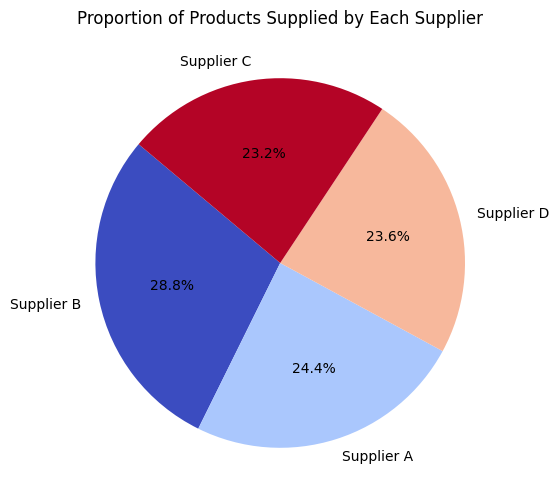

In [38]:
supplier_dependency = products_per_supplier / products_per_supplier.sum()

plt.figure(figsize=(10, 6))
supplier_dependency.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='coolwarm')
# This argument formats the percentage labels on the pie slices. 
#'%1.1f%%' means that the percentages will be shown with one decimal place.
plt.title('Proportion of Products Supplied by Each Supplier')
plt.ylabel('')
plt.show()

The pie chart illustrates the proportion of products supplied by each supplier. A significant dependency on a Supplier B is evident, with the proportion of products supplied by them being approximately 29%. This might pose a risk if any of these suppliers’ face disruptions

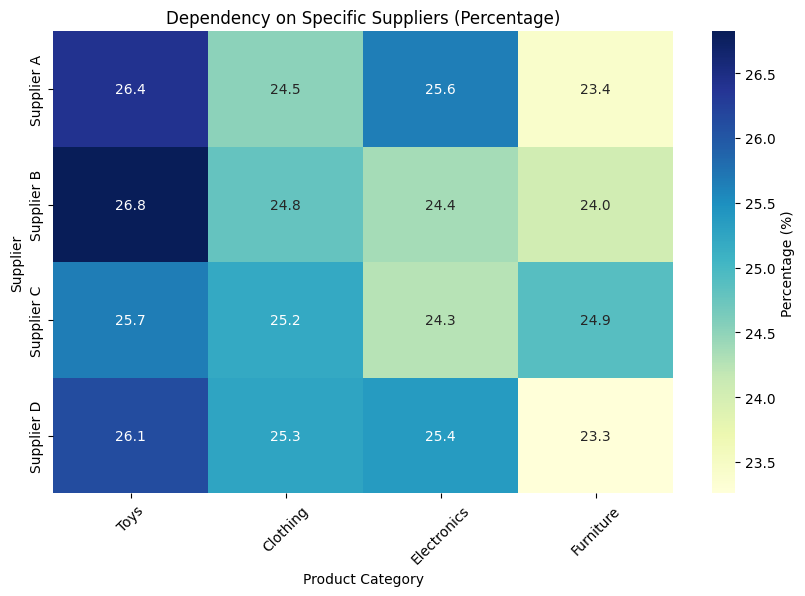

In [39]:
# Pivot the DataFrame to create a matrix format for the heatmap
heatmap_data = df_cleaned.pivot_table(index='Supplier', columns='Category', values='Quantity', fill_value=0)

# Calculate total counts for each supplier
supplier_totals = heatmap_data.sum(axis=1)

# Convert to percentages
percentage_data = heatmap_data.div(supplier_totals, axis=0) * 100
# Calculate total counts for each category and sort them in descending order
category_totals = percentage_data.sum().sort_values(ascending=False)

# Reorder the percentage_data based on the sorted category totals
percentage_data = percentage_data[category_totals.index]
percentage_data
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage (%)'})
plt.title('Dependency on Specific Suppliers (Percentage)')
plt.xlabel('Product Category')
plt.ylabel('Supplier')
plt.xticks(rotation=45)
plt.show()

## C. Stock Trends Analysis

The analysis of stock trends over time, broken down by categories, suppliers, and warehouses, provided a comprehensive view of how stock levels fluctuate.

These trends are vital for making informed decisions about inventory management, restocking schedules, and optimising warehouse operations.

By comparing stock trends across different dimensions, businesses can identify patterns and address issues proactiv

ely.

### Trends in Stock levels Over Time

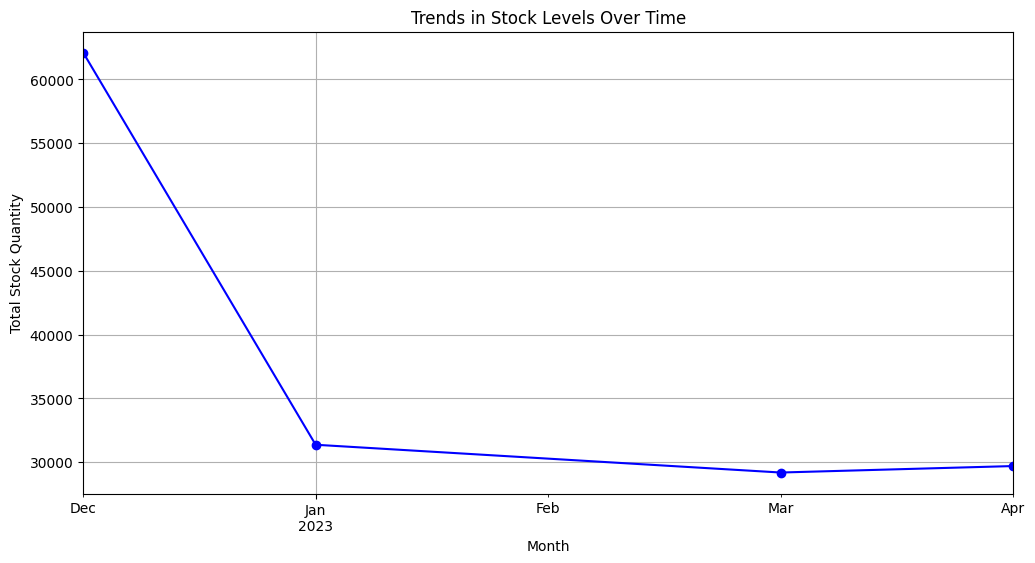

In [40]:
# Extract year and month from the 'Last Restocked' for trend analysis
df_cleaned['Restock Month'] = df_cleaned['Last Restocked'].dt.to_period('M')

# Group by 'Restock Month' and sum the quantity to analyze overall stock levels over time
stock_trend = df_cleaned.groupby('Restock Month')['Quantity'].sum()

plt.figure(figsize=(12, 6))
stock_trend.plot(kind='line', marker='o', color='blue')
plt.title('Trends in Stock Levels Over Time')
plt.xlabel('Month')
plt.ylabel('Total Stock Quantity')
plt.grid(True)
plt.show()

There are visible fluctuations in the stock levels, with December of 2022 being the period that has the highest restocking activity followed by consumption or sales.

### Trends in Stock Levels Over Time by Category:

<Figure size 1400x800 with 0 Axes>

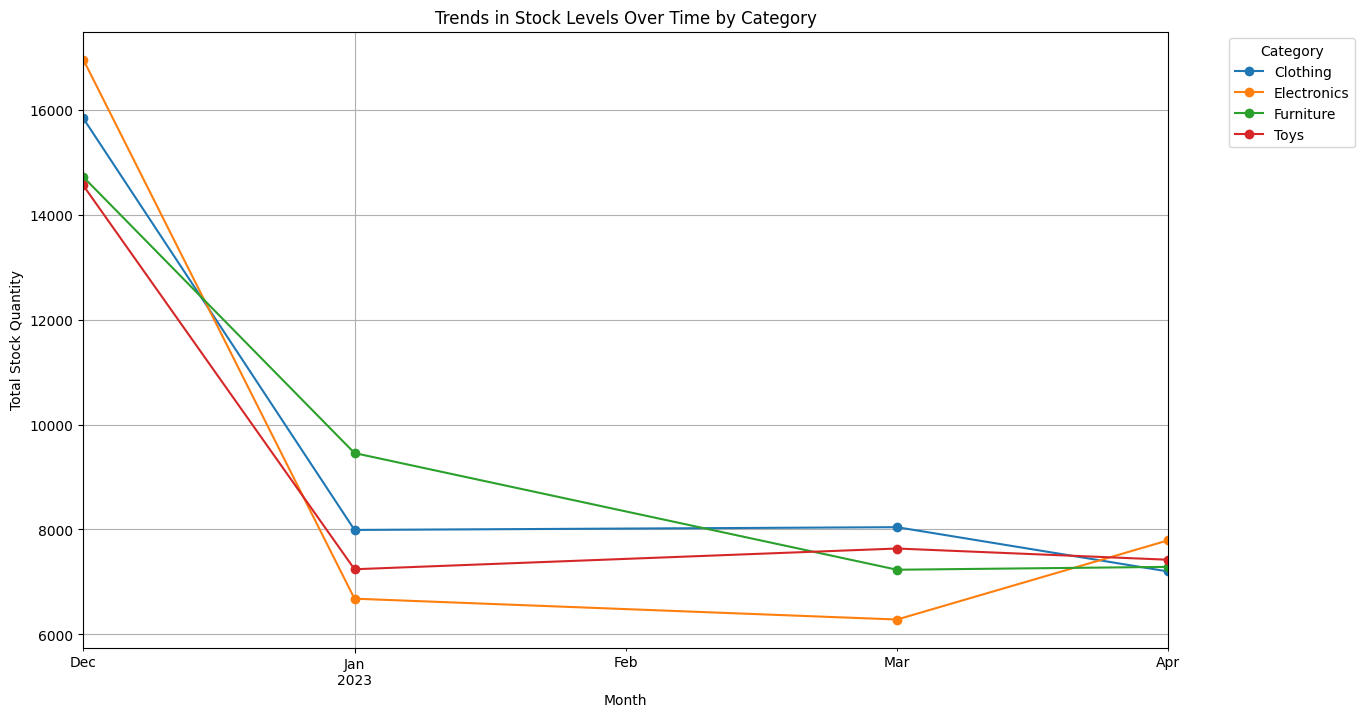

In [41]:
#Group by 'Restock Month' and 'Category' to analyze stock levels by category over time
stock_trend_by_category = df_cleaned.groupby(['Restock Month', 'Category'])['Quantity'].sum().unstack()

# Plot the stock trends for each category
plt.figure(figsize=(14, 8))
stock_trend_by_category.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Trends in Stock Levels Over Time by Category')
plt.xlabel('Month')
plt.ylabel('Total Stock Quantity')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The line chart shows the stock trends for different categories over time. Key observations include:

### 1.Category-Specific Fluctuations:
Each category has distinct trends, with some showing more stability in stock levels, while others experience significant fluctuations.


### 2.Toys and Clothing:
These categories seem to have more consistent restocking patterns, though they also exhibit noticeable peaks and troughs at certain times.

### 3.Electronics and Furniture:
These categories show more pronounced variability, with distinct peaks and dips possibly reflecting seasonality or varying demand.

# D.Warehouse utilisation

Warehouse utilisation was analysed by examining stock trends across different warehouses. This analysis provided insights into how each warehouse contributes to overall stock management, highlighting periods of high activity and identifying potential areas for optimisation.

### Trends in Stock Levels Over Time by Warehouse:

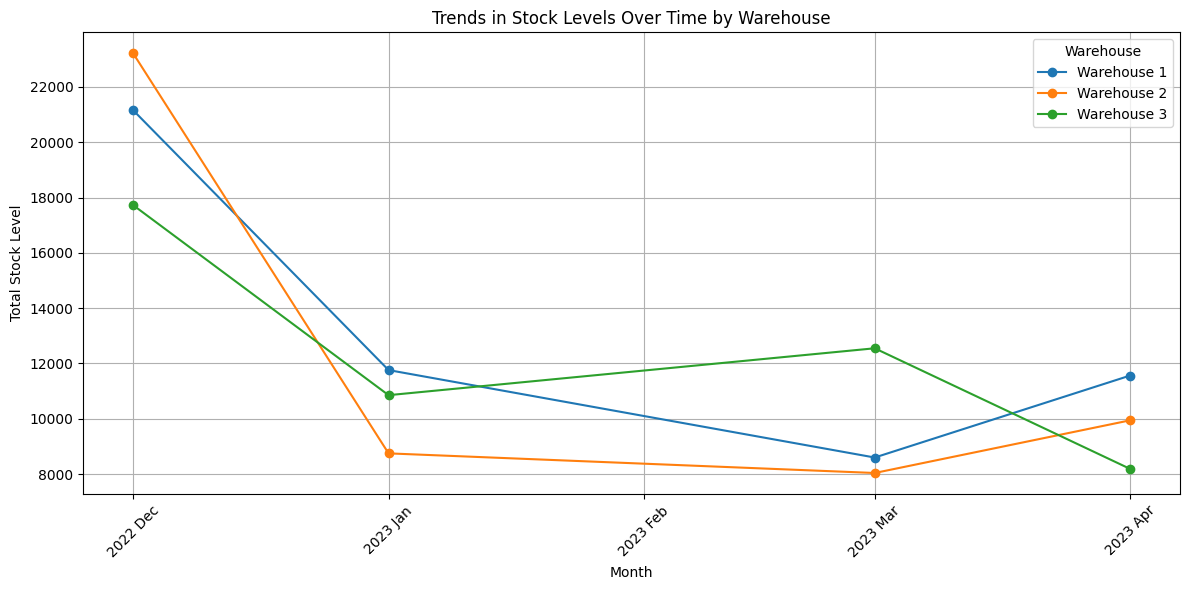

In [42]:
import matplotlib.dates as mdates

df_cleaned['Last Restocked'] = pd.to_datetime(df_cleaned['Last Restocked'])

# Extract Year-Month from Last Restocked
df_cleaned['Year-Month'] = df_cleaned['Last Restocked'].dt.to_period('M')

# Group by Year-Month and Warehouse, summing the quantities
warehouse_stock_trends = df_cleaned.groupby(['Year-Month', 'Warehouse'])['Quantity'].sum().reset_index()

# Convert Year-Month to datetime for plotting
warehouse_stock_trends['Year-Month'] = warehouse_stock_trends['Year-Month'].dt.to_timestamp()

# Plotting stock levels by warehouse over time
plt.figure(figsize=(12, 6))

# Plot each warehouse separately
for warehouse in warehouse_stock_trends['Warehouse'].unique():
    warehouse_data = warehouse_stock_trends[warehouse_stock_trends['Warehouse'] == warehouse]
    plt.plot(warehouse_data['Year-Month'], warehouse_data['Quantity'], marker='o', linestyle='-', label=warehouse)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))  # Format to Year Abbreviated Month

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Stock Level')
plt.title('Trends in Stock Levels Over Time by Warehouse')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Warehouse')
plt.tight_layout()

# Show plot
plt.show();

The line chart illustrates stock trends across different warehouses over time. Here are the key observations:

### 1.Warehouse 2:
Warehouse 2 appears to maintain relatively stable stock levels, though it has experienced fluctuations that might correspond to specific restocking events or high-demand periods.


### 2.Warehouse 1:
This warehouse shows more variability in stock levels, with some noticeable peaks and troughs, indicating periods of increased activity or demand.

### 3.Warehouse 3:
Warehouse 3 seems to have the most dynamic stock levels, with significant fluctuations.
This could suggest that it handles products with higher demand variability or that it serves as a secondary or overflow warehouse.

### 4.Comparison:
The comparison shows that each warehouse has its own unique trend, likely influenced by the types of products stored, the role of the warehouse in the overall logistics network, and possibly regional demand differences.

## Trends in Stock Levels Over Time by Supplier

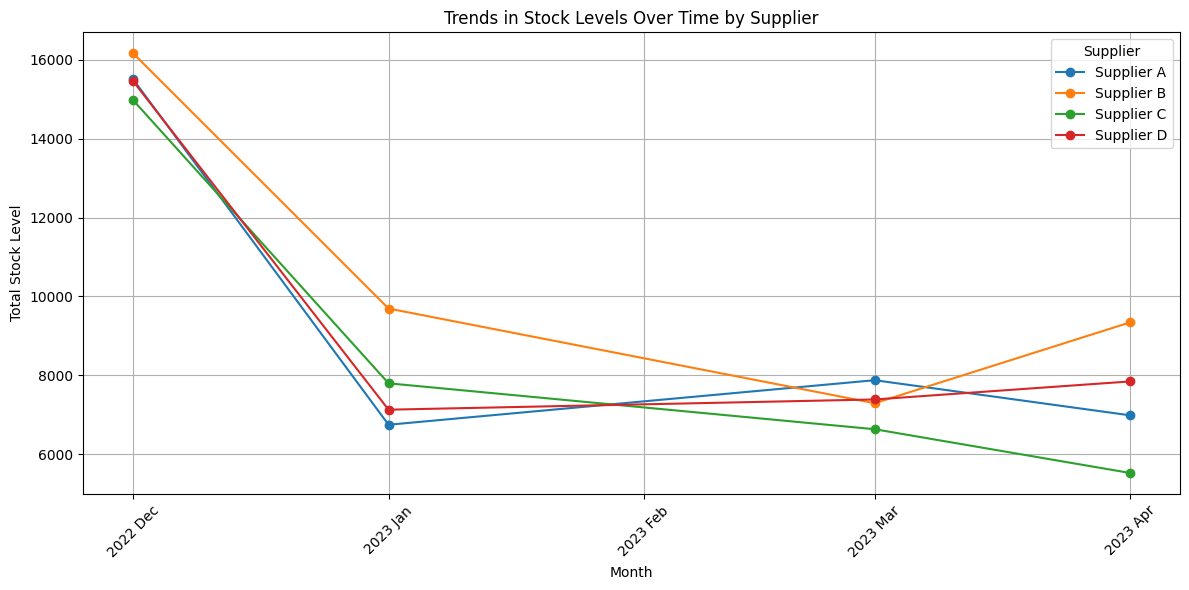

In [43]:
import matplotlib.dates as mdates

# Assuming df_cleaned is already defined and structured as mentioned
# Convert Last Restocked to datetime (if not already done)
df_cleaned['Last Restocked'] = pd.to_datetime(df_cleaned['Last Restocked'])

# Extract Year-Month from Last Restocked
df_cleaned['Year-Month'] = df_cleaned['Last Restocked'].dt.to_period('M')

# Group by Year-Month and Supplier, summing the quantities
supplier_stock_trends = df_cleaned.groupby(['Year-Month', 'Supplier'])['Quantity'].sum().reset_index()

# Convert Year-Month to datetime for plotting
supplier_stock_trends['Year-Month'] = supplier_stock_trends['Year-Month'].dt.to_timestamp()

# Plotting stock levels by supplier over time
plt.figure(figsize=(12, 6))

# Plot each supplier separately
for supplier in supplier_stock_trends['Supplier'].unique():
    supplier_data = supplier_stock_trends[supplier_stock_trends['Supplier'] == supplier]
    plt.plot(supplier_data['Year-Month'], supplier_data['Quantity'], marker='o', linestyle='-', label=supplier)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))  # Format to Year Abbreviated Month

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Stock Level')
plt.title('Trends in Stock Levels Over Time by Supplier')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Supplier')
plt.tight_layout()

# Show plot
plt.show();

The line chart compares stock trends across different suppliers over time. Here are some insightproducts.

### 1.Distinct Patterns for Each Supplier:
Each supplier exhibits unique stock trends, reflecting differences in their supply schedules, product demand, or the variety of products they provide.


### 2.Supplier A and Supplier D:
These suppliers show relatively consistent stock levels over time, with minor fluctuations. This could indicate steady supply and demand for the products they provide.

### 3.Supplier C:
This supplier shows more significant fluctuations, with periods of high restocking followed by sharp declines. This could be due to high demand for specific products, irregular restocking, or seasonal effects.

### 4.Supplier B:
Supplier B seems to have the most volatile trend, with sharp peaks and valleys, possibly indicating challenges in maintaining consistent stock levels or varying demand for their products.

# Summary of warehouse analysis

The analysis carried out above is by no means exhaustive but does provide a good starting point for further detailed analyses into specific aspects of the warehouse management data.

However, several key takeaways can be derived from the analysis performed so far.

## Key observations

### 1.Category and Product Management:
Certain categories, such as Electronics and Furniture, maintain more stable stock levels, while others like Clothing and Toys show more volatility.
This suggests that some categories might benefit from more dynamic stock management strategies to prevent stockouts.

### 2.Supplier Dependency: 
The analysis revealed a significant dependency on a few key suppliers.
This concentration poses a risk if these suppliers face supply chain disruptions. Diversifying the supplier base could help mitigate this risk.

### 3.Warehouse Utilisation:
Different warehouses exhibit unique stock level trends, with some showing significant fluctuations.
Understanding these trends allows for better space utilisation and inventory distribution across warehouses.

### 4.Stock Trends: 
The analysis of stock trends over time indicates that certain products and suppliers follow specific restocking patterns.
Recognising these patterns can help in scheduling restocks more effectively and reducing the risk of stockouts.

# Suggestions for Improvement at the Warehouse

### 1.Dynamic Inventory Management:
Implement more dynamic inventory management practices that adjust stock levels based on real-time demand and sales forecasts.
This can help prevent stockouts, especially for high-demand products.
### 2.Supplier Diversification:
Consider diversifying the supplier base to reduce dependency on a few key suppliers.
This will improve supply chain resilience and reduce the risk of disruptions.
### 3.Warehouse Optimisation:
Review warehouse utilisation to optimise space and ensure that high-demand products are easily accessible.
Implementing advanced warehouse management systems (WMS) can aid in better space utilisation and inventory tracking.
### 4.Data-Driven Decision Making:
Utilise the insights gained from stock trends to inform decision-making. Regularly monitor these trends to adjust inventory policies, restocking schedules, and supplier relationships.
### 5.Seasonal Planning:
Given the observed fluctuations in certain categories, implementing seasonal planning can help manage inventory levels more effectively.
Adjust stock levels ahead of peak seasons based on historical data.

# Conclusion
This basic yet detailed analysis of warehouse stock trends offers valuable insights into the dynamics of warehouse management.

By understanding how different factors such as product categories, suppliers, and warehouses impact stock levels, businesses can make more informed decisions, optimise their supply chains, and improve overall efficiency.

Whether it’s managing stockouts, enhancing supplier relationships, or optimising warehouse space, the insights gained from this analysis can lead to more effective and strategic warehouse management.